In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dados = pd.read_csv('dados_clientes.csv')

# EDA

In [ ]:
dados

In [ ]:
dados.dtypes

In [ ]:
dados.describe()

In [ ]:
dados.Sexo.value_counts(normalize = True)

In [ ]:
dados.Sexo.value_counts()

In [ ]:
dados.isna().sum()

In [ ]:
sns.boxenplot(data = dados)

In [ ]:
for column in dados.iloc[:,1:]:
    sns.displot(data = dados.iloc[:, 1:], x=column, kde = True)

# Prep

In [3]:
idCliente = dados.IDCliente
Sexo = dados.Sexo
dataset = dados.drop(columns = ['IDCliente', 'Sexo'])

In [4]:
# Irá definir distâncias negativas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset)
dataset_scaled

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [6]:
# Não irá definir distâncias negativas
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset_scaled_2 = scaler.fit_transform(dataset)
dataset_scaled_2

array([[0.01923077, 0.        , 0.3877551 ],
       [0.05769231, 0.        , 0.81632653],
       [0.03846154, 0.00819672, 0.05102041],
       [0.09615385, 0.00819672, 0.7755102 ],
       [0.25      , 0.01639344, 0.39795918],
       [0.07692308, 0.01639344, 0.76530612],
       [0.32692308, 0.02459016, 0.05102041],
       [0.09615385, 0.02459016, 0.94897959],
       [0.88461538, 0.03278689, 0.02040816],
       [0.23076923, 0.03278689, 0.7244898 ],
       [0.94230769, 0.03278689, 0.13265306],
       [0.32692308, 0.03278689, 1.        ],
       [0.76923077, 0.04098361, 0.14285714],
       [0.11538462, 0.04098361, 0.7755102 ],
       [0.36538462, 0.04098361, 0.12244898],
       [0.07692308, 0.04098361, 0.79591837],
       [0.32692308, 0.04918033, 0.34693878],
       [0.03846154, 0.04918033, 0.66326531],
       [0.65384615, 0.06557377, 0.28571429],
       [0.32692308, 0.06557377, 0.98979592],
       [0.32692308, 0.07377049, 0.34693878],
       [0.13461538, 0.07377049, 0.73469388],
       [0.

# Aval 

## Clustering tendency

In [6]:
# Avaliando a tendência de cluster
# Estatística Hopkins
# >.5 = dataset não clusterizável
# <.5 = dataset clusterizável
# maix prox de 0, melhor.
#!pip install pyclustertend
from pyclustertend import hopkins

hpk = []
for i in range(0,10):
    hpk.append(hopkins(dataset_scaled_2, dataset_scaled_2.shape[0]-1))

print('média hopkins: ', np.mean(hpk))
print('desvio padrão: ', np.std(hpk))

média hopkins:  0.3060010536174287
desvio padrão:  0.008790003295939488


In [ ]:
# VAT - Visual Assessment for Tendency

from pyclustertend import vat
vat(dataset_scaled_2)

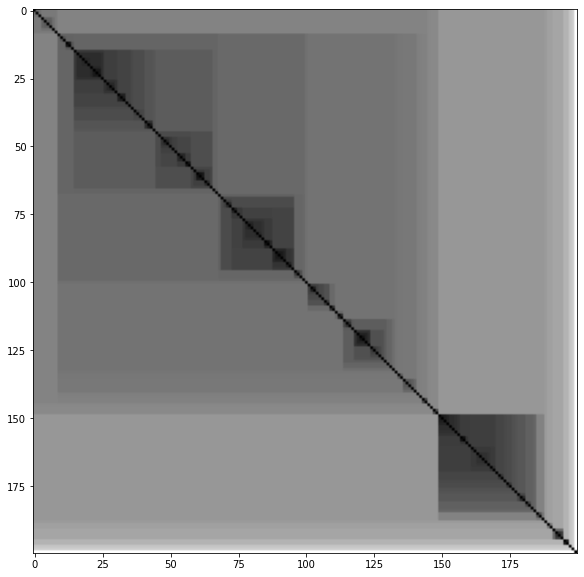

In [8]:
# IVAT - Improved Visual Assessment for Tendency
from pyclustertend import ivat
ivat(dataset_scaled_2)

## Ideal K clusters

In [9]:
from sklearn.cluster import KMeans

distortions = []
K = range(2,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dataset_scaled_2)
    distortions.append(kmeanModel.inertia_)

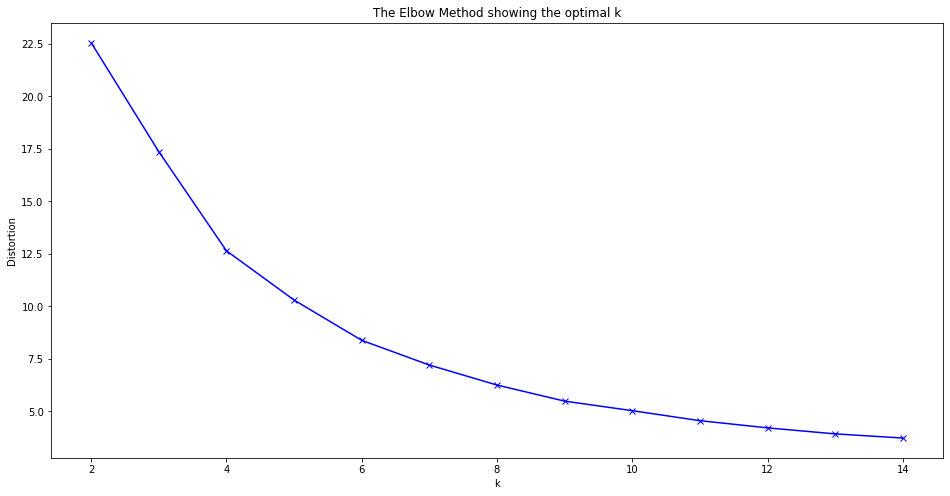

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

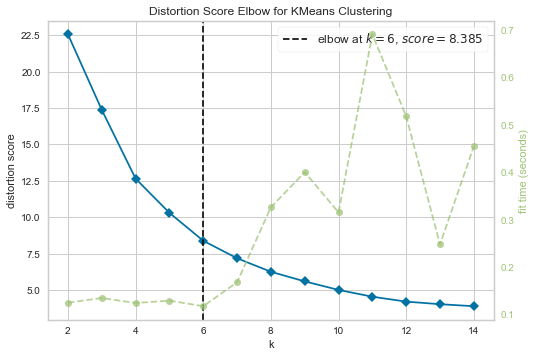

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))
visualizer.fit(dataset_scaled_2)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

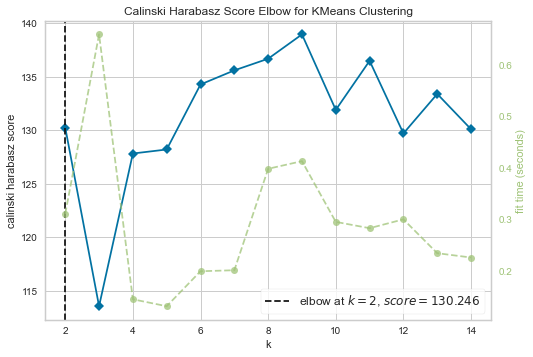

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [13]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15), metric='calinski_harabasz')
visualizer.fit(dataset_scaled_2)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

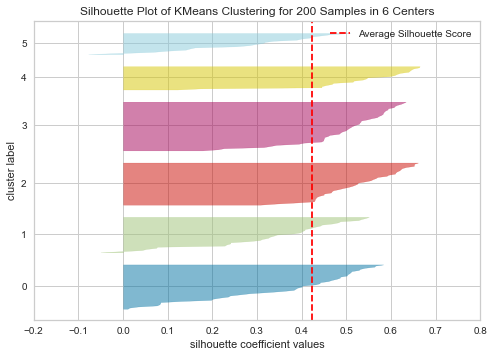

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 200 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [7]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

model = KMeans(6)

visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(dataset_scaled_2)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

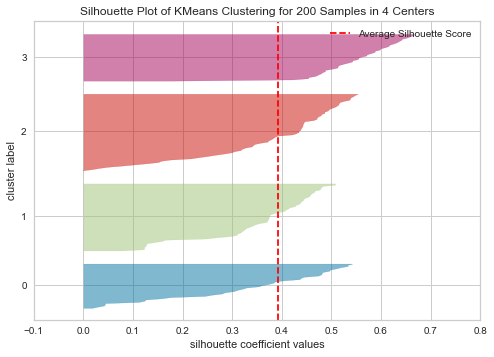

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 200 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [8]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

model = KMeans(4)

visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(dataset_scaled_2)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

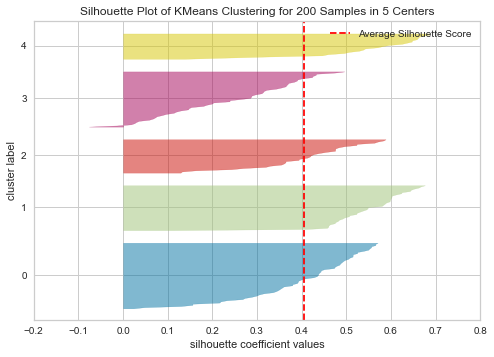

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 200 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [12]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

model = KMeans(5)

visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(dataset_scaled_2)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# Modelling

In [57]:
kmeans = KMeans(n_clusters = 4, init='k-means++', verbose=2)
model_1 = kmeans.fit(dataset_scaled_2)

Initialization complete
Iteration 0, inertia 17.19707740443506
Iteration 1, inertia 13.166366587415018
Iteration 2, inertia 12.775831023978217
Iteration 3, inertia 12.683395725988056
Iteration 4, inertia 12.668020525879337
Iteration 5, inertia 12.657493845858966
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 18.360295117358092
Iteration 1, inertia 13.744841492324156
Iteration 2, inertia 12.92828363662931
Iteration 3, inertia 12.752583396997908
Iteration 4, inertia 12.684563645449332
Iteration 5, inertia 12.653082494393525
Iteration 6, inertia 12.650287676229912
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 18.133422648205688
Iteration 1, inertia 13.184146996156883
Iteration 2, inertia 12.696987345046079
Iteration 3, inertia 12.650287676229912
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 18.345537767327393
Iteration 1, inertia 13.108608699242156
Iteratio

In [71]:
kmeans = KMeans(n_clusters = 6, init='k-means++', verbose=2)
model_2 = kmeans.fit(dataset_scaled_2)

Initialization complete
Iteration 0, inertia 12.753769174877203
Iteration 1, inertia 8.942708588719128
Iteration 2, inertia 8.807836110175161
Iteration 3, inertia 8.78761812486721
Iteration 4, inertia 8.783732766485208
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 10.66584940408362
Iteration 1, inertia 8.97147131993987
Iteration 2, inertia 8.843427769634499
Iteration 3, inertia 8.812837142175745
Iteration 4, inertia 8.794957869300852
Iteration 5, inertia 8.786536088105933
Iteration 6, inertia 8.781005185108574
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 11.960365823719288
Iteration 1, inertia 8.966729957109582
Iteration 2, inertia 8.785160392214198
Iteration 3, inertia 8.770773920082522
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 14.742009765369982
Iteration 1, inertia 10.530294048600942
Iteration 2, inertia 9.943314219409158
Iteration 3, inertia 9.

In [76]:
kmeans = KMeans(n_clusters = 3, init='k-means++', verbose=2)
model_3 = kmeans.fit(dataset_scaled_2)

Initialization complete
Iteration 0, inertia 23.123555468928096
Iteration 1, inertia 19.169095821078525
Iteration 2, inertia 18.92431913714347
Iteration 3, inertia 18.83305010998966
Iteration 4, inertia 18.778201691577813
Iteration 5, inertia 18.364992999653623
Iteration 6, inertia 17.738561444784885
Iteration 7, inertia 17.552085404783988
Iteration 8, inertia 17.544558227486075
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 25.22284291623795
Iteration 1, inertia 18.173144810781103
Iteration 2, inertia 17.759050355379028
Iteration 3, inertia 17.55667261594576
Iteration 4, inertia 17.544558227486075
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 27.073862372570343
Iteration 1, inertia 21.64552156756173
Iteration 2, inertia 19.67283097939224
Iteration 3, inertia 19.344228332975906
Iteration 4, inertia 19.08789002786742
Iteration 5, inertia 18.91786060437969
Iteration 6, inertia 18.866614832038096
Iter

In [80]:
kmeans = KMeans(n_clusters = 10, init='k-means++', verbose=2)
model_4 = kmeans.fit(dataset_scaled_2)

Initialization complete
Iteration 0, inertia 7.5818342835598695
Iteration 1, inertia 5.909883798338623
Iteration 2, inertia 5.706947139650662
Iteration 3, inertia 5.6702478306676
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 7.2803269698739435
Iteration 1, inertia 5.5445557875736196
Iteration 2, inertia 5.182002600956892
Iteration 3, inertia 5.065767240785998
Iteration 4, inertia 5.042767979693032
Iteration 5, inertia 5.0283537566488405
Iteration 6, inertia 5.010332822696822
Iteration 7, inertia 5.0040772143125745
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 8.29629232736696
Iteration 1, inertia 6.630536661196653
Iteration 2, inertia 6.166965035386339
Iteration 3, inertia 6.010577131122216
Iteration 4, inertia 5.987903225611442
Iteration 5, inertia 5.971450250628566
Iteration 6, inertia 5.9437760389654475
Iteration 7, inertia 5.933187426037551
Iteration 8, inertia 5.928032955680882
Converged at i

# Results

In [58]:
model_1.cluster_centers_

array([[0.28605769, 0.58278689, 0.82168367],
       [0.69201183, 0.26809584, 0.39764521],
       [0.14304993, 0.20491803, 0.60508414],
       [0.41093117, 0.58606557, 0.1895811 ]])

In [59]:
np.unique(model_1.labels_, return_counts=True)

(array([0, 1, 2, 3]), array([40, 65, 57, 38], dtype=int64))

In [60]:
result = dados.copy()
result['Cluster'] = model_1.labels_.tolist()

In [61]:
result

,IDCliente,Sexo,Idade,Salario_Mensal_Milhar,Pontuacao_Gasto,Cluster
0,1,Masculino,19,15,39,2
1,2,Masculino,21,15,81,2
2,3,Feminino,20,16,6,2
3,4,Feminino,23,16,77,2
4,5,Feminino,31,17,40,2
...,...,...,...,...,...,...
195,196,Feminino,35,120,79,0
196,197,Feminino,45,126,28,3
197,198,Masculino,32,126,74,0
198,199,Masculino,32,137,18,3


In [62]:
result.drop(columns=['IDCliente','Sexo']).groupby(['Cluster']).agg(['mean'])

,Idade,Salario_Mensal_Milhar,Pontuacao_Gasto
,mean,mean,mean
Cluster,,,
0,32.875000,86.100000,81.525000
1,53.984615,47.707692,39.969231
2,25.438596,40.000000,60.298246
3,39.368421,86.500000,19.578947


In [65]:
result.drop(columns=['IDCliente']).groupby(['Sexo','Cluster']).count()[['Idade']].rename(columns={'Idade':'Contagem'})

Contagem
Sexo      Cluster          
Feminino  0              22
          1              37
          2              34
          3              19
Masculino 0              18
          1              28
          2              23
          3              19

<AxesSubplot:xlabel='Salario_Mensal_Milhar', ylabel='Idade'>

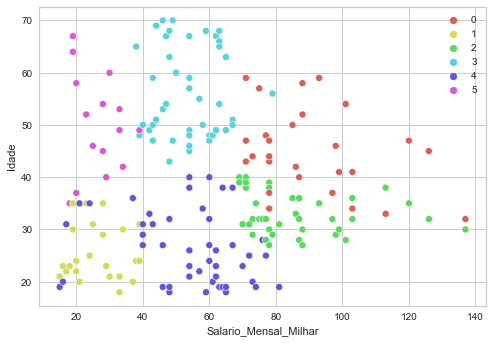

In [78]:
sns.scatterplot(data=pd.DataFrame(dataset, columns = ['Idade','Salario_Mensal_Milhar','Pontuacao_Gasto']), 
x='Salario_Mensal_Milhar', y='Idade', hue = model_2.labels_.tolist(), palette=sns.color_palette("hls",6))

<AxesSubplot:xlabel='Salario_Mensal_Milhar', ylabel='Idade'>

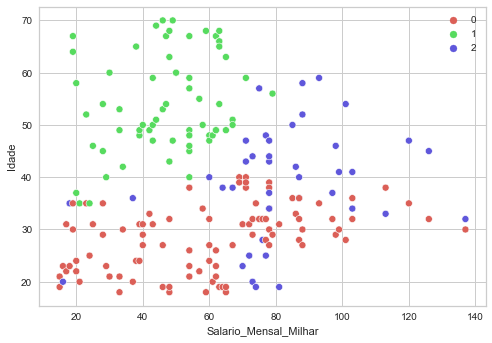

In [79]:
sns.scatterplot(data=pd.DataFrame(dataset, columns = ['Idade','Salario_Mensal_Milhar','Pontuacao_Gasto']), 
x='Salario_Mensal_Milhar', y='Idade', hue = model_3.labels_.tolist(), palette=sns.color_palette("hls",3))

<AxesSubplot:xlabel='Salario_Mensal_Milhar', ylabel='Idade'>

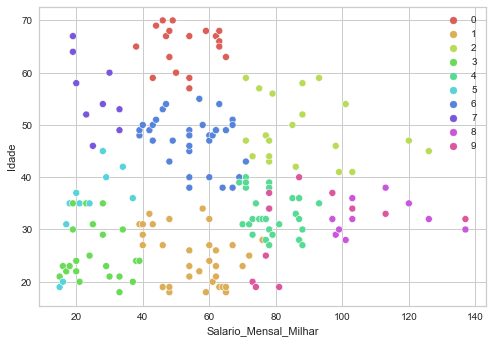

In [81]:
sns.scatterplot(data=pd.DataFrame(dataset, columns = ['Idade','Salario_Mensal_Milhar','Pontuacao_Gasto']), 
x='Salario_Mensal_Milhar', y='Idade', hue = model_4.labels_.tolist(), palette=sns.color_palette("hls",10))

<AxesSubplot:xlabel='Salario_Mensal_Milhar', ylabel='Idade'>

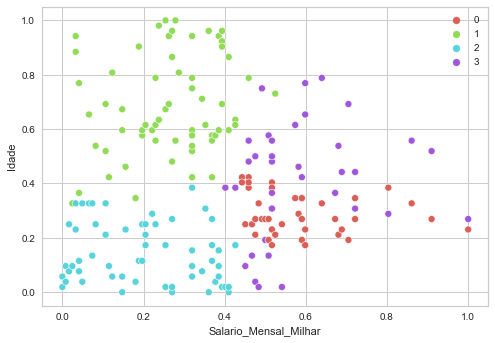

In [75]:
sns.scatterplot(data=pd.DataFrame(dataset_scaled_2, columns = ['Idade','Salario_Mensal_Milhar','Pontuacao_Gasto']), 
x='Salario_Mensal_Milhar', y='Idade', hue = model_1.labels_.tolist(), palette=sns.color_palette("hls",4))

<AxesSubplot:xlabel='Pontuacao_Gasto', ylabel='Idade'>

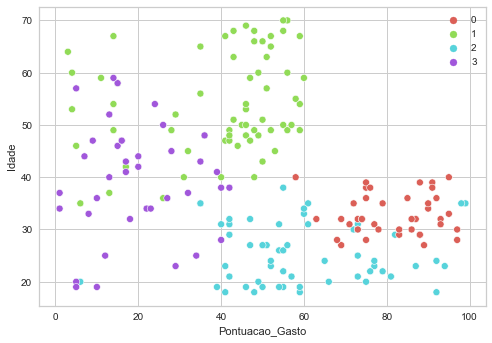

In [82]:
sns.scatterplot(data=pd.DataFrame(dataset, columns = ['Idade','Salario_Mensal_Milhar','Pontuacao_Gasto']), 
x='Pontuacao_Gasto', y='Idade', hue = model_1.labels_.tolist(), palette=sns.color_palette("hls",4))

<AxesSubplot:xlabel='Pontuacao_Gasto', ylabel='Salario_Mensal_Milhar'>

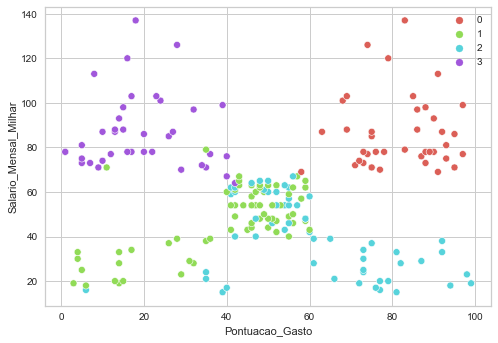

In [83]:
sns.scatterplot(data=pd.DataFrame(dataset, columns = ['Idade','Salario_Mensal_Milhar','Pontuacao_Gasto']), 
x='Pontuacao_Gasto', y='Salario_Mensal_Milhar', hue = model_1.labels_.tolist(), palette=sns.color_palette("hls",4))

# Extra

In [32]:
from sklearn.datasets import load_iris
iris = load_iris()

In [37]:
from pyclustertend import hopkins

hpk = []
for i in range(0,10):
    hpk.append(hopkins(iris.data, iris.data.shape[0]-1))

print('média hopkins: ', np.mean(hpk))
print('desvio padrão: ', np.std(hpk))

média hopkins:  0.16679892398210563
desvio padrão:  0.004929230624852672


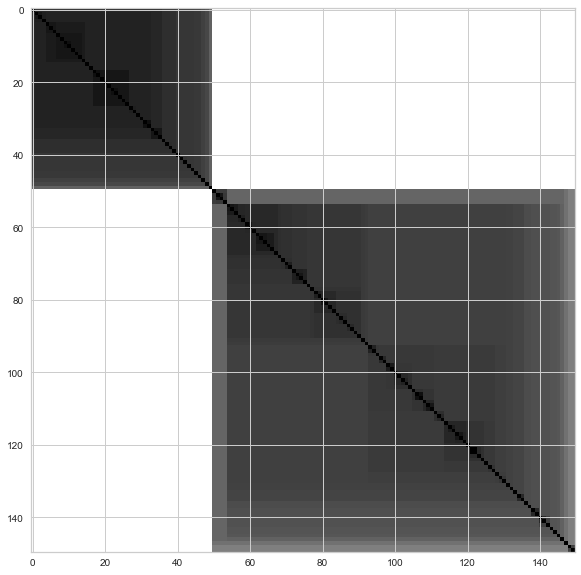

In [41]:
from pyclustertend import ivat

ivat(iris.data)

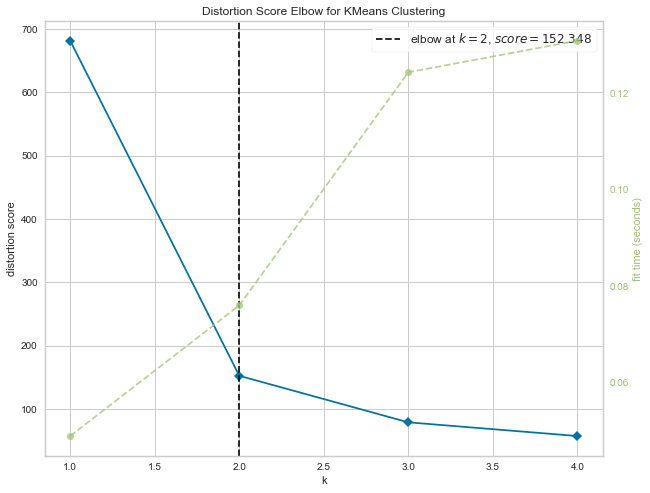

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,5))
visualizer.fit(iris.data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

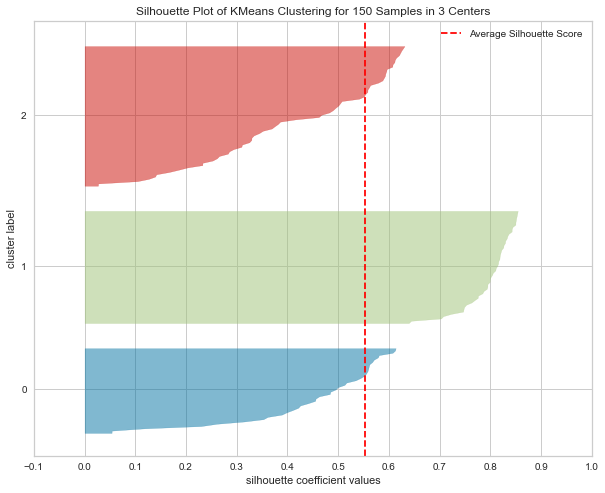

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [55]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

model = KMeans(3)

visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(iris.data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

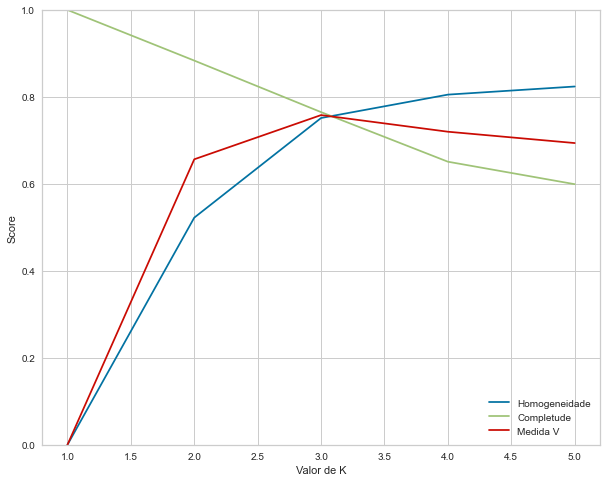

In [46]:
from sklearn.metrics import homogeneity_completeness_v_measure

HCVs = []
valores_k = range(1,6)
for K in valores_k:
    
    # Criando o classificador e fazendo previsões sobre o cluster para cada ponto de dados
    y_pred = KMeans(n_clusters = K, random_state = 101).fit_predict(iris.data)
    
    # Calculando as métricas
    HCVs.append(homogeneity_completeness_v_measure(iris.target, y_pred))

plt.plot(valores_k, [el[0] for el in HCVs], 'b', label = 'Homogeneidade')
plt.plot(valores_k, [el[1] for el in HCVs], 'g', label = 'Completude')
plt.plot(valores_k, [el[2] for el in HCVs], 'r', label = 'Medida V')
plt.ylim([0, 1])
plt.xlabel("Valor de K")
plt.ylabel("Score")
plt.legend(loc = 4)
plt.show()

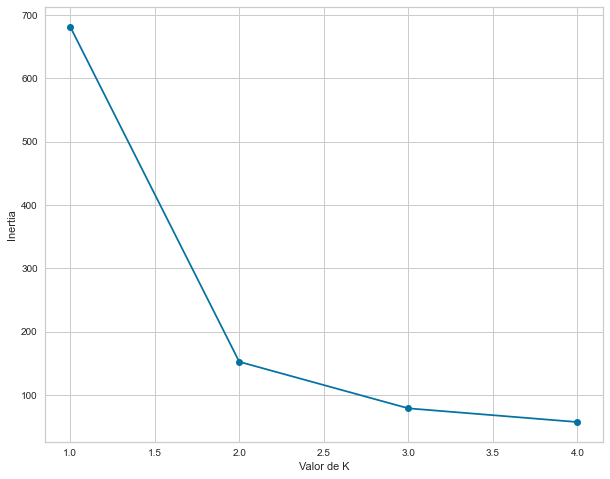

In [47]:
# Lista de valores de K
Ks = range(1, 5)

# Lista para as métricas
valores_metrica = []

# Loop por diferentes modelos com diferentes valores de K
for K in Ks:
    modelo = KMeans(n_clusters = K, random_state = 101)
    modelo.fit(iris.data)
    valores_metrica.append(modelo.inertia_)

plt.plot(Ks, valores_metrica, 'o-')
plt.xlabel("Valor de K")
plt.ylabel("Inertia")
plt.show()

In [56]:
model = KMeans(n_clusters = 3)
y_pred = model.fit_predict(iris.data)